In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
mulheres_pb = pd.read_csv("paraibanas.csv", sep=";")
mulheres_pb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49022 entries, 0 to 49021
Data columns (total 14 columns):
UF                   49022 non-null object
COD_MUNICIPIO        49022 non-null int64
NO_MUNICIPIO         49022 non-null object
UF_RES               49022 non-null object
COD_MUNICIPIO_RES    49022 non-null int64
NO_MUNICIPIO_RES     49022 non-null object
CD_DESCR             49022 non-null object
Raça                 49022 non-null object
COD_IDADE            49022 non-null object
IDADE                49022 non-null int64
DT_INTER             49022 non-null int64
DT_SAIDA             49022 non-null int64
QUANTIDADE           49022 non-null int64
MORTE                49022 non-null int64
dtypes: int64(7), object(7)
memory usage: 5.2+ MB


In [3]:
mulheres_vale = mulheres_pb[mulheres_pb['NO_MUNICIPIO_RES'].isin(['BAIA DA TRAICAO','CUITE DE MAMANGUAPE','CURRAL DE CIMA','ITAPOROROCA','JACARAU','MAMANGUAPE','MARCACAO','MATARACA','PEDRO REGIS','RIO TINTO'])]
mulheres_vale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 10121 to 48080
Data columns (total 14 columns):
UF                   1826 non-null object
COD_MUNICIPIO        1826 non-null int64
NO_MUNICIPIO         1826 non-null object
UF_RES               1826 non-null object
COD_MUNICIPIO_RES    1826 non-null int64
NO_MUNICIPIO_RES     1826 non-null object
CD_DESCR             1826 non-null object
Raça                 1826 non-null object
COD_IDADE            1826 non-null object
IDADE                1826 non-null int64
DT_INTER             1826 non-null int64
DT_SAIDA             1826 non-null int64
QUANTIDADE           1826 non-null int64
MORTE                1826 non-null int64
dtypes: int64(7), object(7)
memory usage: 214.0+ KB


## Municípios com mais casos de hospitalização de mulheres na Paraíba e na região metropolitana do Vale do Mamanguape e Rio Tinto com CID10 capítulos XIX e XX de 2009 a 2020

In [4]:
casos_pb = mulheres_pb.NO_MUNICIPIO_RES.value_counts().to_frame().reset_index().rename(columns = {"index" : "municipios_pb", "NO_MUNICIPIO_RES" : "qtd_casos_pb"})[:10]
casos_vale = mulheres_vale.NO_MUNICIPIO_RES.value_counts().to_frame().reset_index().rename(columns = {"index" : "municipios_vale", "NO_MUNICIPIO_RES" : "qtd_casos_vale"})[:10]

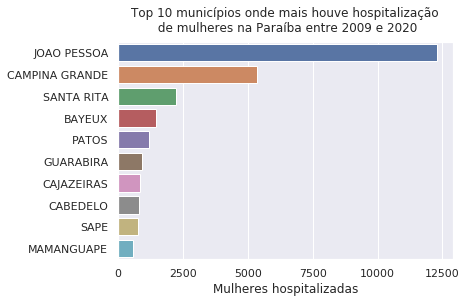

In [5]:
sns.barplot(y="municipios_pb", x="qtd_casos_pb", data=casos_pb)
plt.title("Top 10 municípios onde mais houve hospitalização\n de mulheres na Paraíba entre 2009 e 2020", y=1.02)
plt.ylabel('')
plt.xlabel('Mulheres hospitalizadas')
sns.set_context("talk")

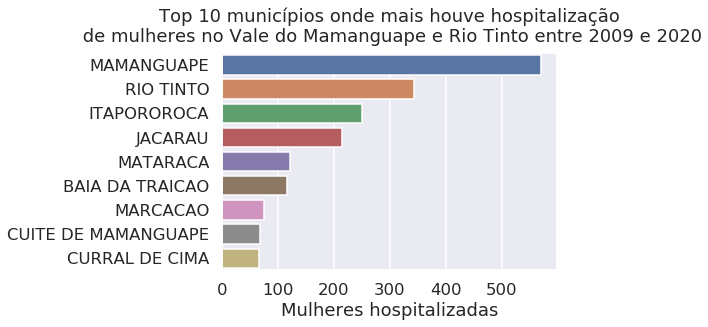

In [6]:
sns.barplot(y="municipios_vale", x="qtd_casos_vale", data=casos_vale)
plt.title("Top 10 municípios onde mais houve hospitalização\n de mulheres no Vale do Mamanguape e Rio Tinto entre 2009 e 2020", y=1.02)
plt.ylabel('')
plt.xlabel('Mulheres hospitalizadas')
sns.set_context("talk")

## Municípios com mais óbitos de mulheres na Paraíba e na região metropolitana do Vale do Mamanguape e Rio Tinto com CID10 capítulos XIX e XX de 2009 a 2020

In [7]:
obitos_pb = mulheres_pb.loc[(mulheres_pb['MORTE']) == 1]
obitos_vale = mulheres_vale.loc[(mulheres_vale['MORTE']) == 1]

ob_pb = obitos_pb.NO_MUNICIPIO_RES.value_counts().to_frame().reset_index().rename(columns = {"index" : "municipios", "NO_MUNICIPIO_RES" : "qtd_obitos"})[:10]
ob_vale = obitos_vale.NO_MUNICIPIO_RES.value_counts().to_frame().reset_index().rename(columns = {"index" : "municipios", "NO_MUNICIPIO_RES" : "qtd_obitos"})[:10]

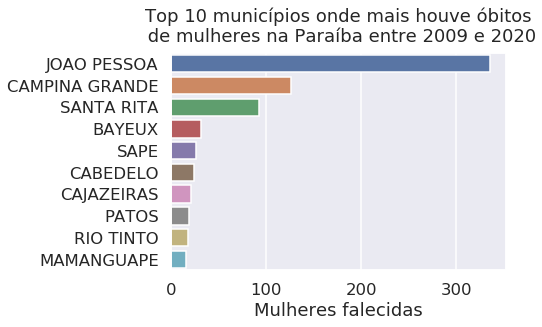

In [8]:
sns.barplot(x="qtd_obitos", y="municipios", data=ob_pb)
plt.title("Top 10 municípios onde mais houve óbitos\n de mulheres na Paraíba entre 2009 e 2020", y=1.02)
plt.ylabel('')
plt.xlabel('Mulheres falecidas')
sns.set_context("talk")

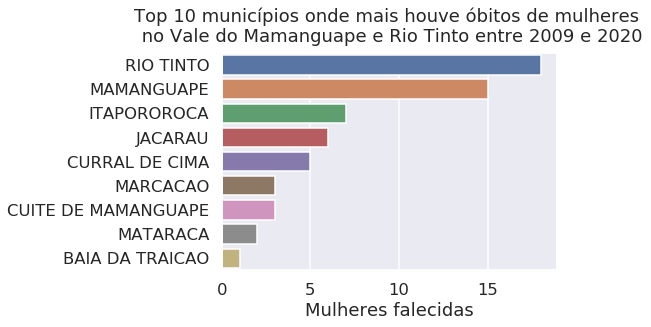

In [9]:
sns.barplot(x="qtd_obitos", y="municipios", data=ob_vale)
plt.title("Top 10 municípios onde mais houve óbitos de mulheres \n no Vale do Mamanguape e Rio Tinto entre 2009 e 2020", y=1.02)
plt.ylabel('')
plt.xlabel('Mulheres falecidas')
sns.set_context("talk")

# Comparação do top10 causas de hospitalização entre mulheres da Paraíba e do Vale do Mamanguape com CID10 capítulos XIX e XX de 2009 a 2020

In [10]:
causas_hosp_pb = mulheres_pb.CD_DESCR.value_counts().to_frame().reset_index().rename(columns = {"index" : "causas", "CD_DESCR" : "qtd_causas"})[:10]
causas_hosp_vale = mulheres_vale.CD_DESCR.value_counts().to_frame().reset_index().rename(columns = {"index" : "causas", "CD_DESCR" : "qtd_causas"})[:10]

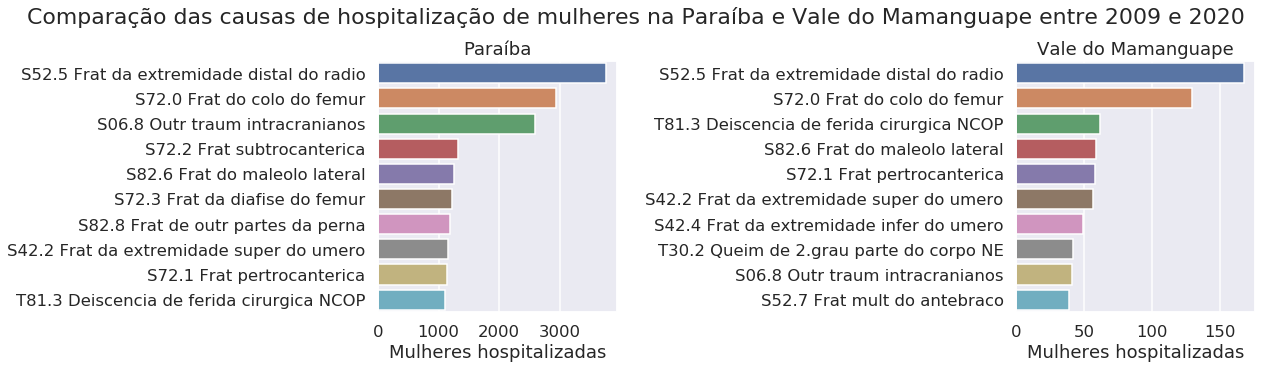

In [11]:
fig, ax = plt.subplots(1,2, figsize=(18, 5))
sns.barplot(x="qtd_causas", y="causas", data=causas_hosp_pb, ax=ax[0])
sns.barplot(x="qtd_causas", y="causas", data=causas_hosp_vale, ax=ax[1])
fig.suptitle('Comparação das causas de hospitalização de mulheres na Paraíba e Vale do Mamanguape entre 2009 e 2020', fontsize=22, y=1.04)
ax[0].set_title('Paraíba')
ax[1].set_title('Vale do Mamanguape')
ax[0].set(ylabel="", xlabel="Mulheres hospitalizadas")
ax[1].set(ylabel="", xlabel="Mulheres hospitalizadas")
sns.set_context("talk")
fig.tight_layout()

# Comparação do top10 causas de óbitos entre mulheres da Paraíba e do Vale do Mamanguape com CID10 capítulos XIX e XX de 2009 a 2020

In [12]:
causas_obito_pb = obitos_pb.CD_DESCR.value_counts().to_frame().reset_index().rename(columns = {"index" : "causas", "CD_DESCR" : "qtd_causas"})[:10]
causas_obito_vale = obitos_vale.CD_DESCR.value_counts().to_frame().reset_index().rename(columns = {"index" : "causas", "CD_DESCR" : "qtd_causas"})[:10]

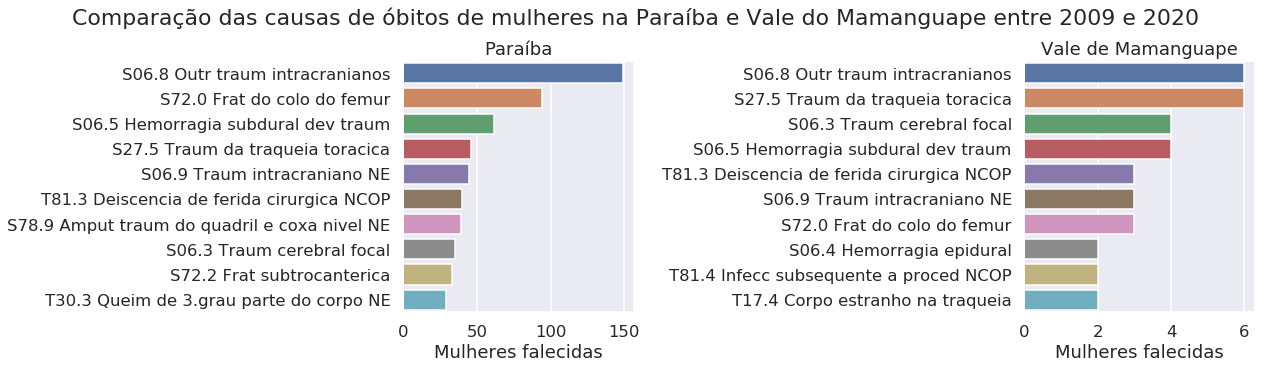

In [13]:
fig, ax = plt.subplots(1,2, figsize=(18, 5))
sns.barplot(x="qtd_causas", y="causas", data=causas_obito_pb, ax=ax[0])
sns.barplot(x="qtd_causas", y="causas", data=causas_obito_vale, ax=ax[1])
fig.suptitle('Comparação das causas de óbitos de mulheres na Paraíba e Vale do Mamanguape entre 2009 e 2020', fontsize=22, y=1.04)
ax[0].set_title('Paraíba')
ax[1].set_title('Vale de Mamanguape')
ax[0].set(ylabel="", xlabel="Mulheres falecidas")
ax[1].set(ylabel="", xlabel="Mulheres falecidas")
sns.set_context("talk")
fig.tight_layout()

# Comparação de raça entre mulheres da Paraíba e do Vale do Mamanguape e Rio Tinto que foram hospitalizadas entre 2009 e 2020 com CID10 capítulos XIX e XX

In [14]:
raca_pb = mulheres_pb[~mulheres_pb['Raça'].isin(['Sem informação'])].Raça.value_counts().to_frame().reset_index().rename(columns = {"index" : "racas", "Raça" : "qtd_racas"})[:10]
raca_vale = mulheres_vale[~mulheres_vale['Raça'].isin(['Sem informação'])].Raça.value_counts().to_frame().reset_index().rename(columns = {"index" : "racas", "Raça" : "qtd_racas"})[:10]

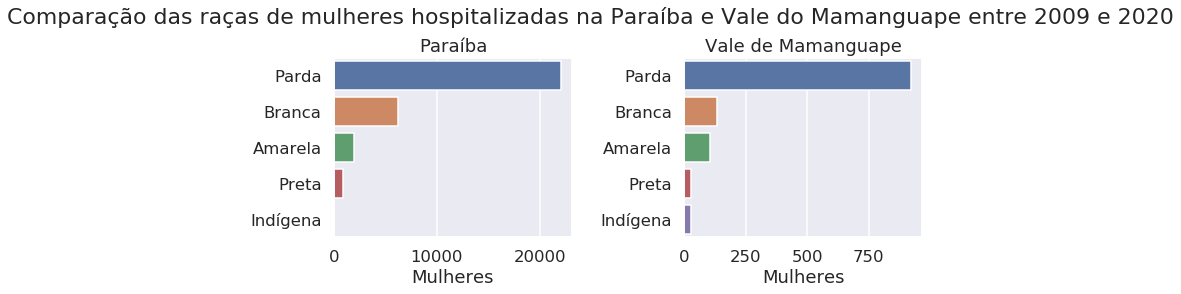

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))
sns.barplot(x="qtd_racas", y="racas", data=raca_pb, ax=ax[0])
sns.barplot(x="qtd_racas", y="racas", data=raca_vale, ax=ax[1])
fig.suptitle('Comparação das raças de mulheres hospitalizadas na Paraíba e Vale do Mamanguape entre 2009 e 2020', fontsize=22, y=1.04)
ax[0].set_title('Paraíba')
ax[1].set_title('Vale de Mamanguape')
ax[0].set(ylabel="", xlabel="Mulheres")
ax[1].set(ylabel="", xlabel="Mulheres")
sns.set_context("talk")
fig.tight_layout()

# Comparação das idades de mulheres da Paraíba e do Vale do Mamanguape e Rio Tinto que foram hospitalizadas entre 2009 e 2020 com CID10 capítulos XIX e XX

In [16]:
idade_pb = mulheres_pb.IDADE.value_counts().to_frame().reset_index().rename(columns = {"index" : "idade", "IDADE" : "qtd_idades"})[:10]
idade_vale = mulheres_vale.IDADE.value_counts().to_frame().reset_index().rename(columns = {"index" : "idade", "IDADE" : "qtd_idades"})[:10]

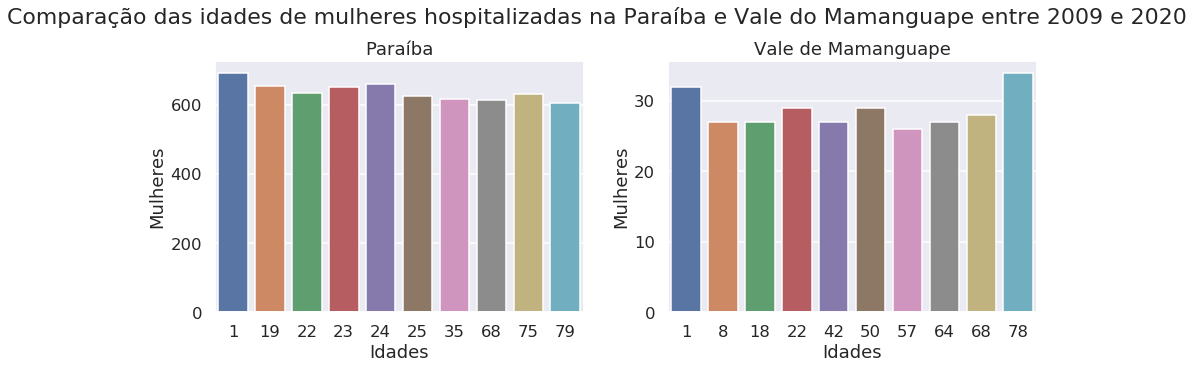

In [17]:
fig, ax = plt.subplots(1,2, figsize=(13, 5))
sns.barplot(y="qtd_idades", x="idade", data=idade_pb, ax=ax[0])
sns.barplot(y="qtd_idades", x="idade", data=idade_vale, ax=ax[1])
fig.suptitle('Comparação das idades de mulheres hospitalizadas na Paraíba e Vale do Mamanguape entre 2009 e 2020', fontsize=22, y=1.04)
ax[0].set_title('Paraíba')
ax[1].set_title('Vale de Mamanguape')
ax[0].set(xlabel="Idades", ylabel="Mulheres")
ax[1].set(xlabel="Idades", ylabel="Mulheres")
sns.set_context("talk")
fig.tight_layout()